In [96]:
!pip install ipykernel
import pandas as pd

In [97]:
#Data Ingestion
df=pd.read_csv(r'C:\Users\ravil\OneDrive\Desktop\iNeuron_FSDS 2.0\FSDSRegression-main\notebooks\data\gemstone.csv')

In [98]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [99]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [100]:
df=df.drop('id',axis=1)

In [101]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [102]:
df.duplicated().sum()

0

In [103]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         carat        cut color clarity  depth  table     x     y     z  price
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81    681
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 co

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [105]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print(categorical_columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [106]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [107]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [108]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [109]:
df['cut'].nunique()

5

In [110]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


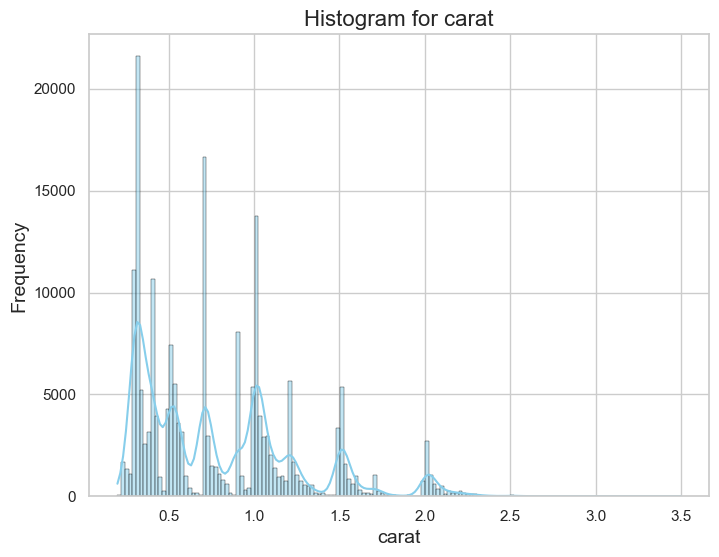

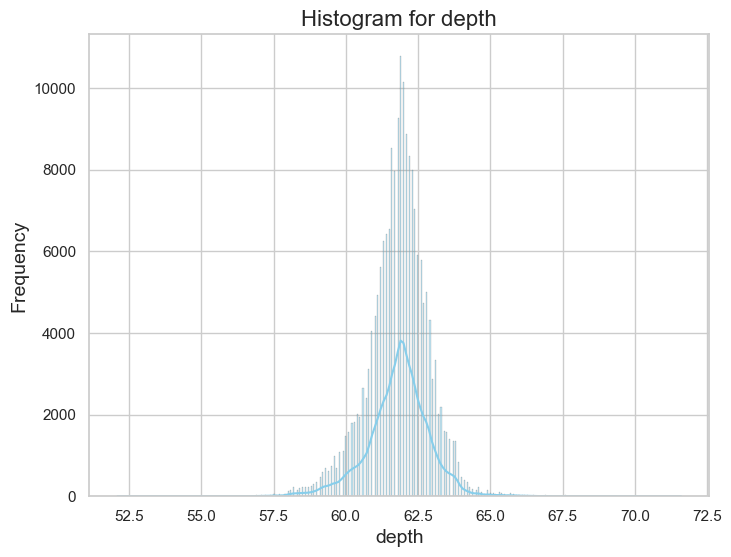

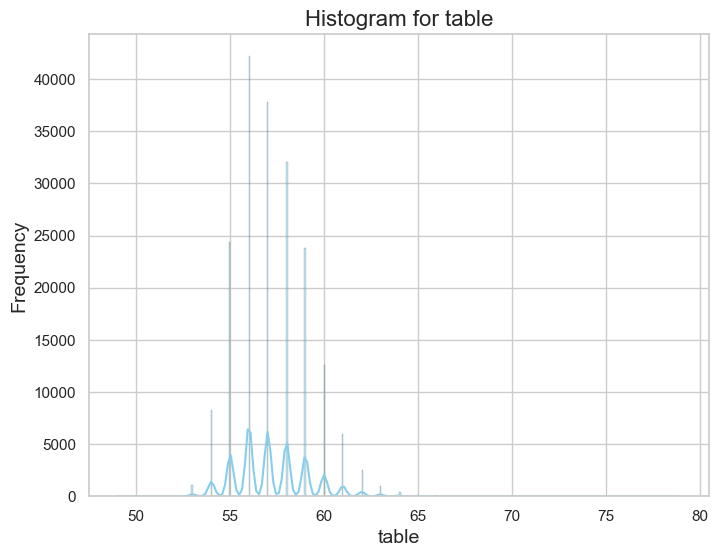

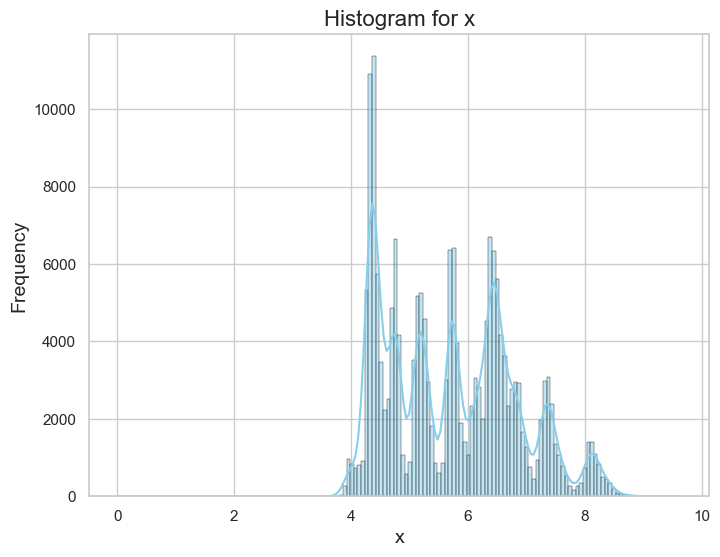

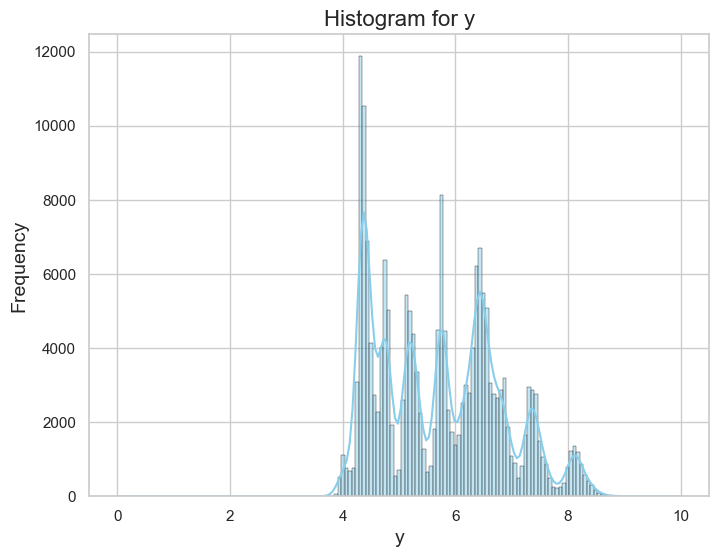

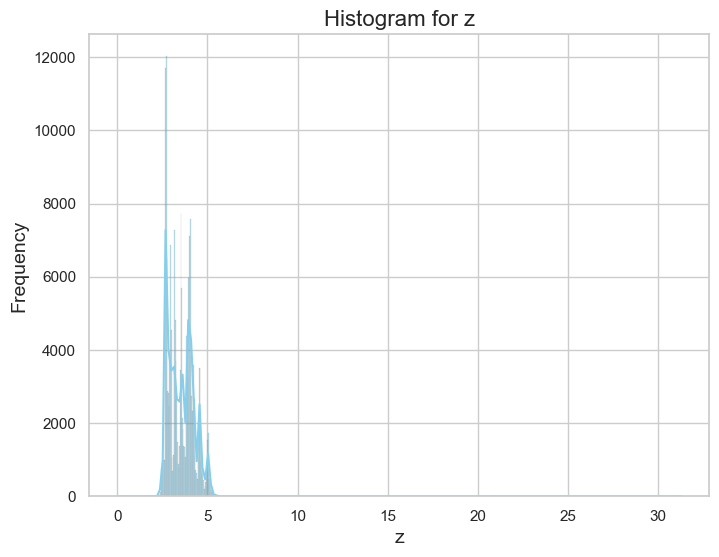

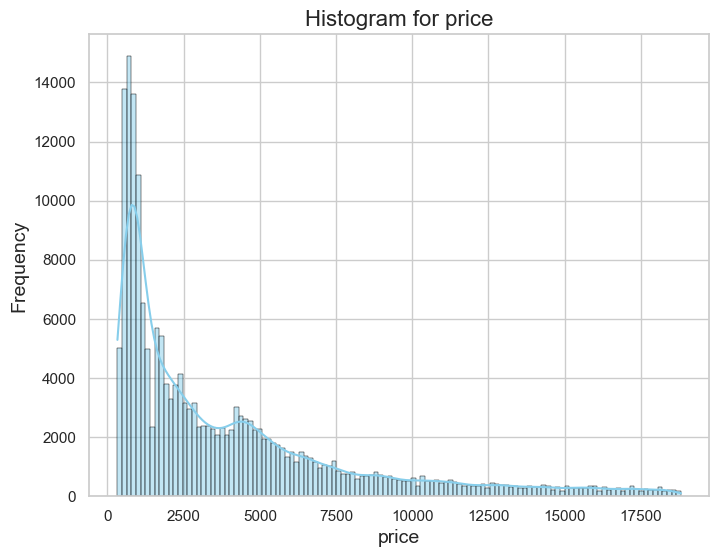

In [112]:
sns.set(style="whitegrid")

# Loop through numerical columns and create histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}', fontsize=16)  # Set the title for each plot
    plt.xlabel(column, fontsize=14)  # Set x-axis label
    plt.ylabel('Frequency', fontsize=14)  # Set y-axis label
    plt.show()  # Display the plot

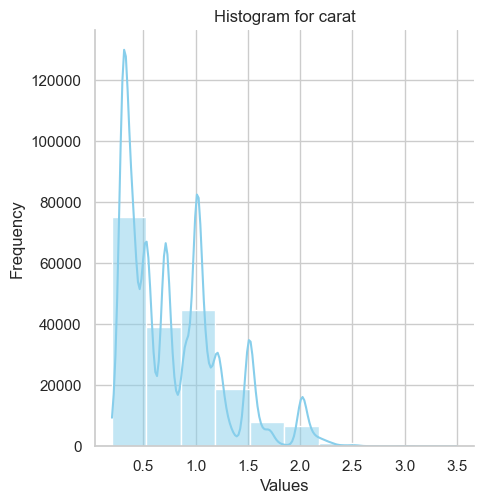

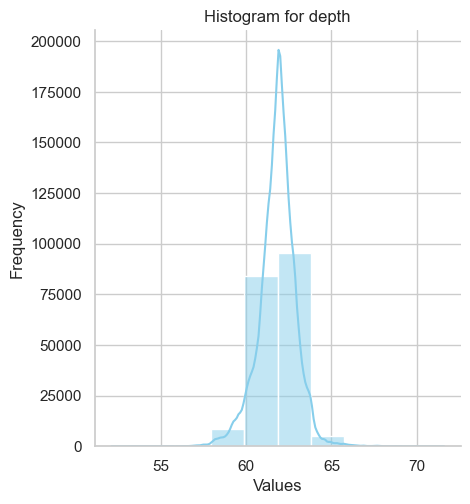

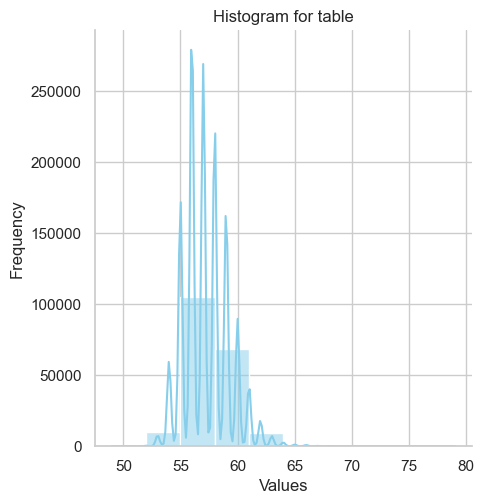

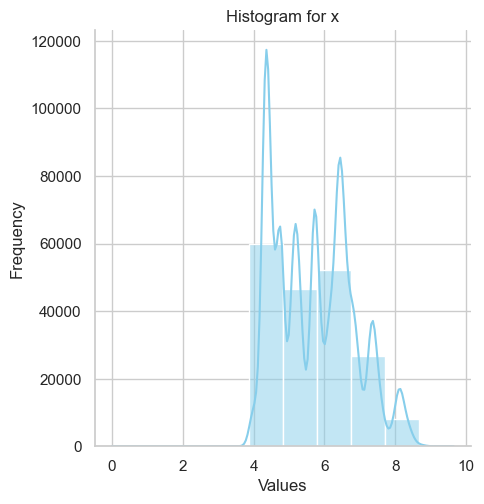

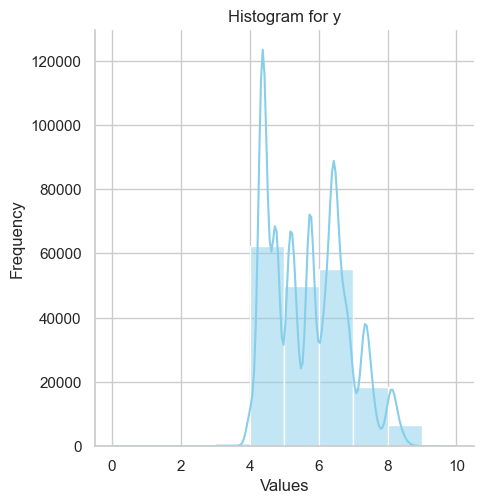

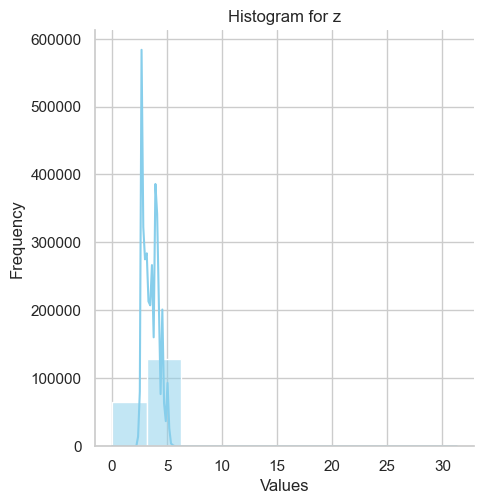

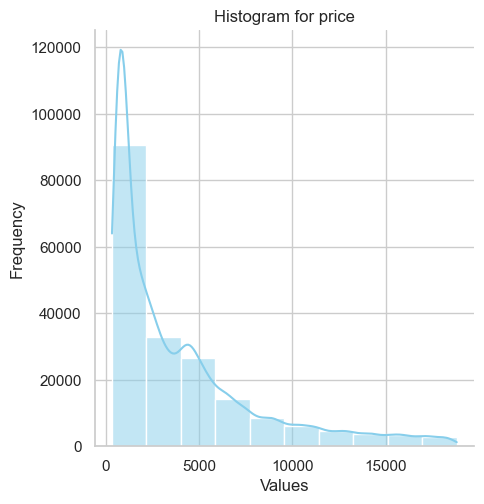

In [122]:
for column in numerical_columns:
    sns.displot(df[column], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

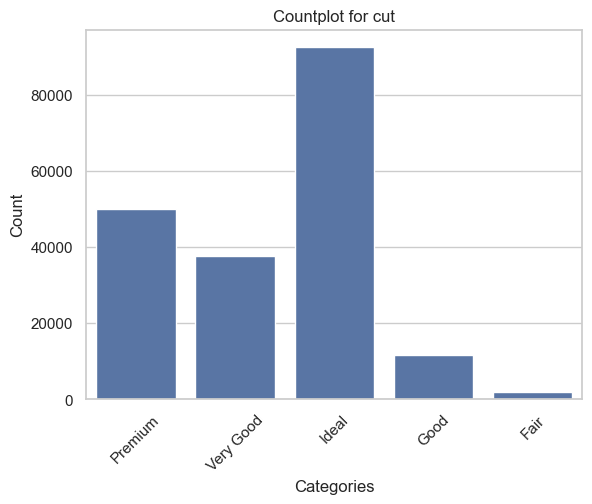

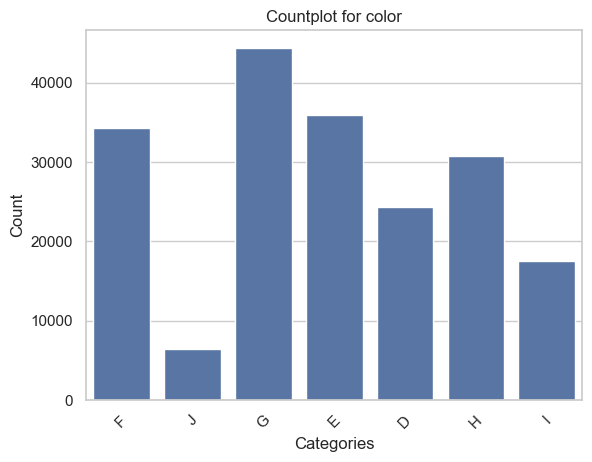

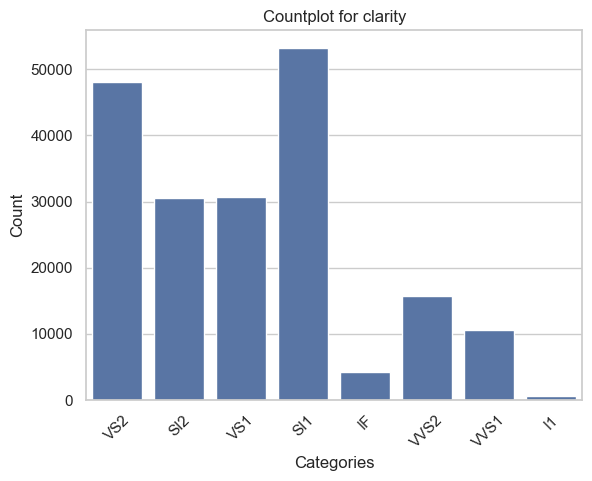

In [114]:
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot for {column}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

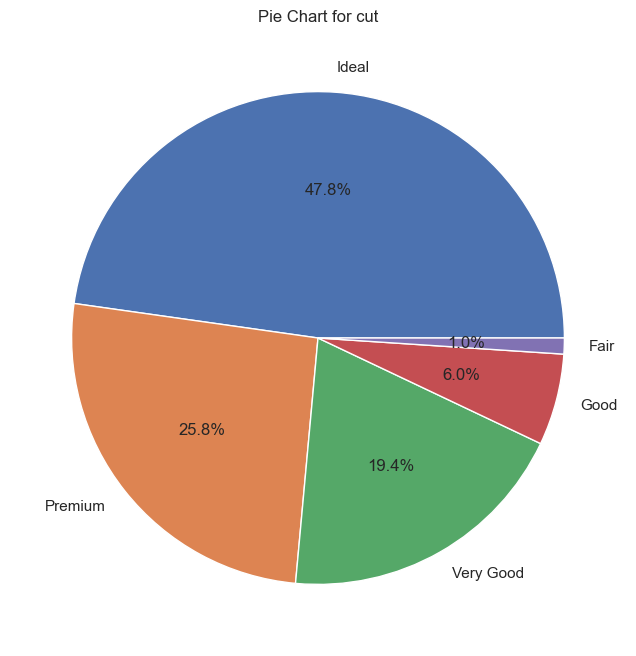

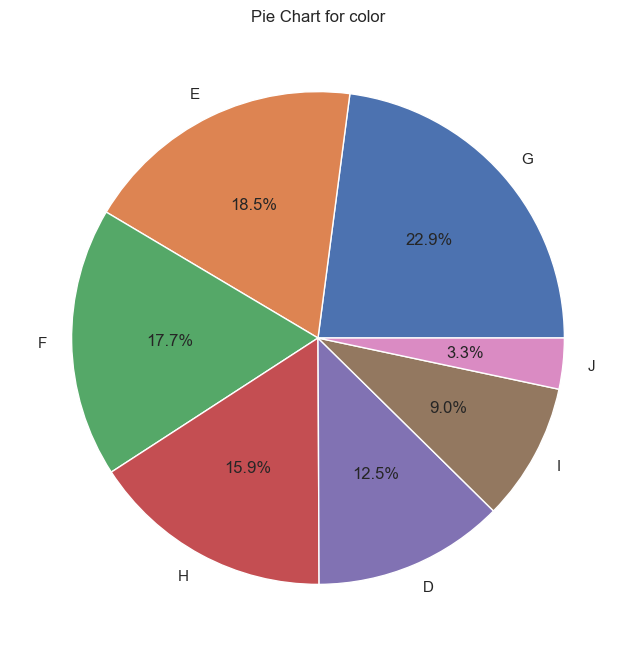

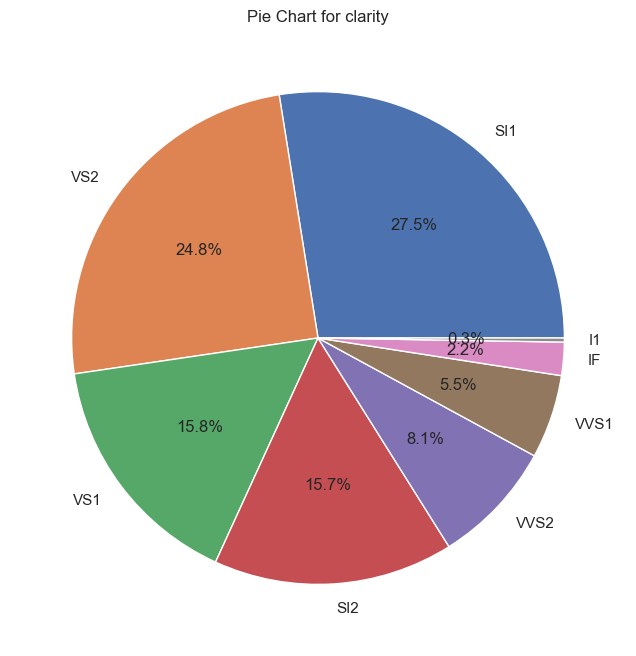

In [115]:
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()

In [123]:
#sns.heatmap(df.corr())

In [ ]:
#df.drop(['x','y','z'],inplace=True,axis=1)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


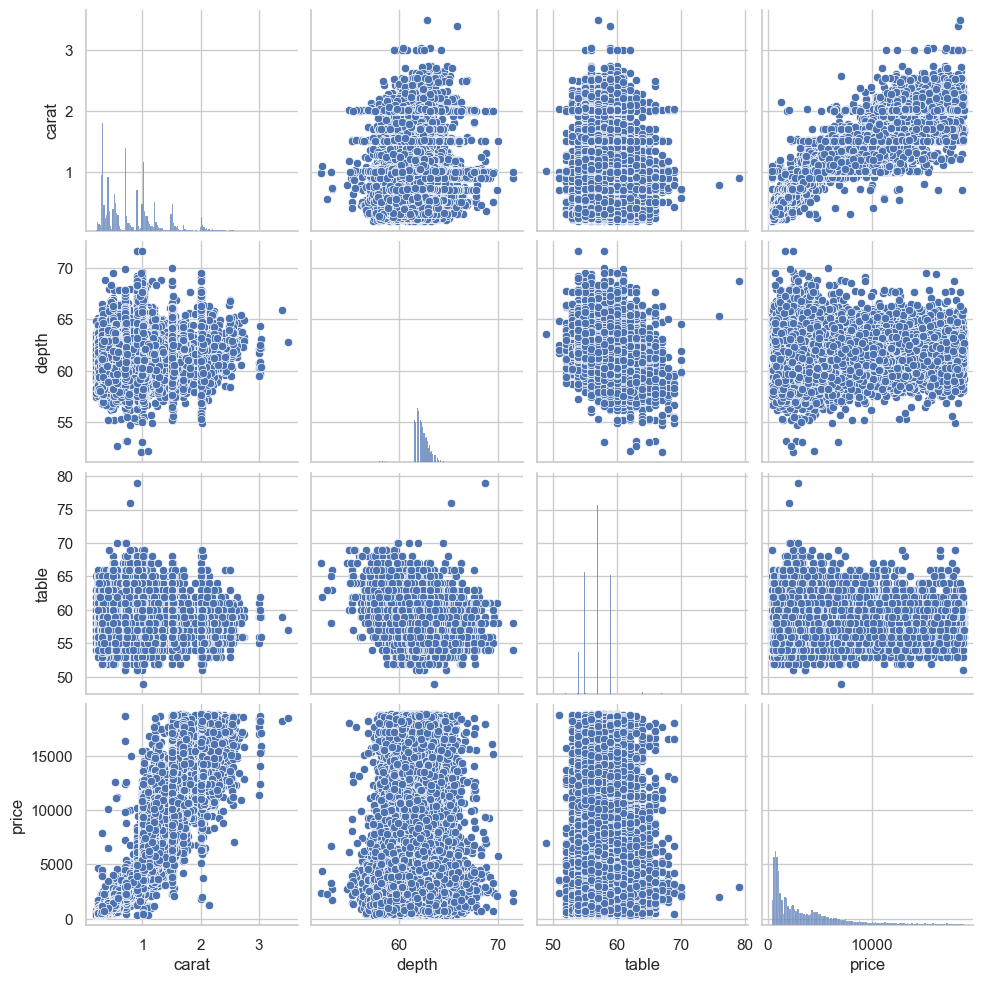

In [ ]:
sns.pairplot(df)

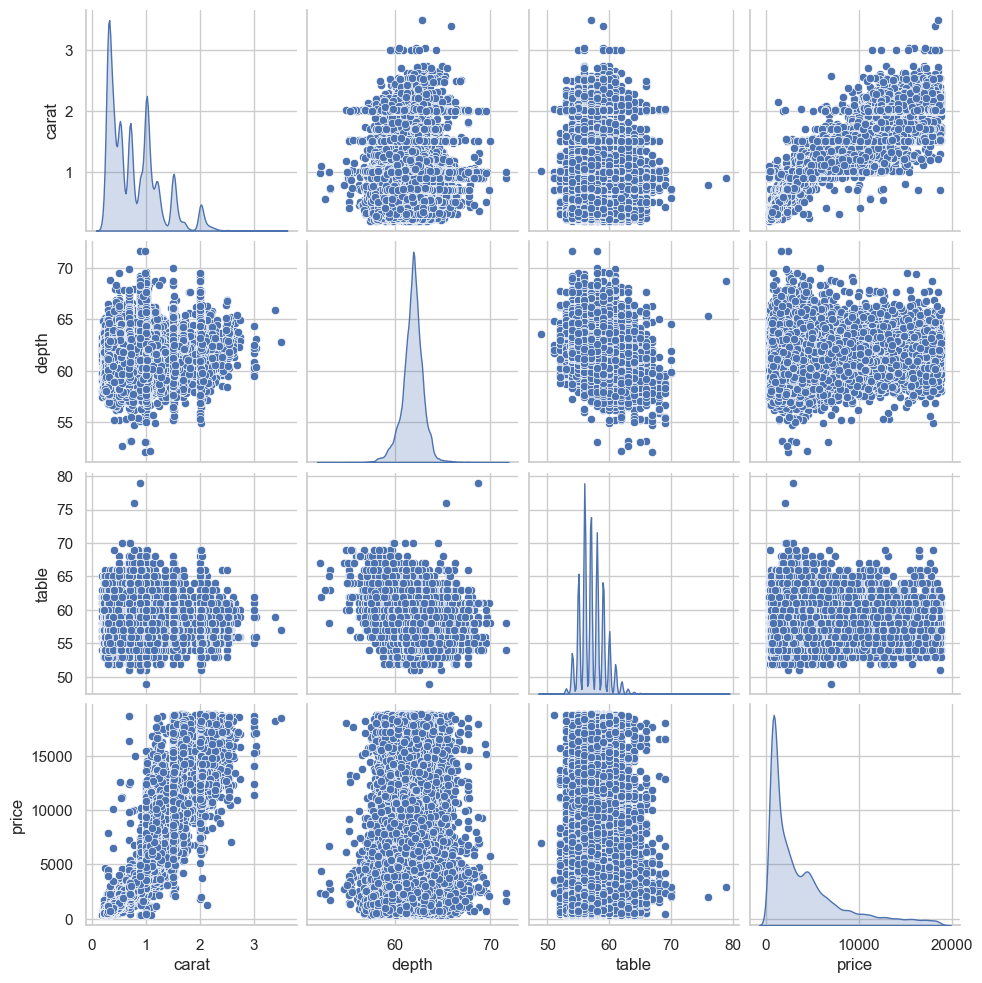

In [ ]:
sns.pairplot(df, diag_kind='kde')  # 'kde' for kernel density estimation on the diagonal

In [ ]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [ ]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [ ]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [ ]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
clarity_map={'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}

In [ ]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [ ]:
color_map={'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [119]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [124]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
